In [2]:
import numpy as np
import requests
import matplotlib.pyplot as plt
import h5py
import os
import illustris_python as il
import scipy.stats as stats
import urllib.request
import shutil
import matplotlib.colors as colors
import six
from matplotlib.colors import LogNorm
import colorsys
import logging
logging.getLogger('scida').setLevel(logging.ERROR)
from os.path import isfile,expanduser
from scipy.spatial import cKDTree
from tqdm import tqdm
from scida import load
import dask.array as da
import h5py
import seaborn as sns
import seaborn as sns
import multiprocessing as mp
from matplotlib.lines import Line2D
from functools import partial
from matplotlib.colors import ListedColormap
import gc  # import the garbage collector
import pandas as pd
import matplotlib.cm as cm
from matplotlib.patches import Circle
import numpy as np
import h5py
import matplotlib.ticker as ticker
from matplotlib import colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.stats import binned_statistic_2d

Warning! Using default configuration. Please adjust/replace in '/u/fahma/.config/scida/config.yaml'.


In [6]:
basePath = "/virgotng/universe/IllustrisTNG/TNG100-3/output"

In [35]:
#Data for Halo_Gas, IGM_Gas, All_Gas

IGMHalo_mean = []
IGMgas_mean = []
Halogas_mean= []
redshift = []
prim_sol = 0.0127
for i in range(2,100):

    
    ds = load(basePath+f"/snapdir_{i:03d}",units=False)
    redshift.append(ds.header["Redshift"])
    gas = ds["PartType0"]
    mask_IGM = gas["GroupID"] == 9223372036854775807
    rev_mask = np.logical_not(mask_IGM)
    gas_IGM = {key: gas[key][mask_IGM] for key in ["GFM_Metallicity"]}
    gas_halo = {key: gas[key][rev_mask] for key in ["GFM_Metallicity"]}

    IGMHalo_mean.append(gas["GFM_Metallicity"].mean().compute()/prim_sol)
    IGMgas_mean.append(gas_IGM["GFM_Metallicity"].mean().compute()/prim_sol)
    Halogas_mean.append(gas_halo["GFM_Metallicity"].mean().compute()/prim_sol)
    


#### The code below was made to run on a screen and the script used was "Z_z_bins.py"

In [18]:
##import numpy as np
##import dask.array as da
##
### Define the base path
##basePath = "/virgotng/universe/IllustrisTNG/TNG100-3/output/"
##
### Function to find the redshift value for a given snapshot
##def find_value_in_snap_Z(value, snap_array):
##    snap_Z = np.array(snap_array)
##    return snap_Z[snap_Z[:, 0] == value, 1][0]
##
### Initialize the snap_Z list
##snap_Z = []
##for i in range(100):
##    redshift = il.groupcat.loadHeader(basePath, i)["Redshift"]
##    snap_Z.append([i, redshift])
##
### Define mass bins
##mass_bins = [1e14, 1e13, 1e12, 1e11, 1e10]
##keys = ["14+", "13-14", "12-13", "11-12", "10-11", "-10"]
##
### Initialize the final result dictionary
##bin_Z_z = {}
##
### Loop over snapshots from 2 to 100
##for snap in [99]:
##    print("Within Snap Loop")
##    ds = load(basePath + f"/snapdir_{snap:03d}", units=False)
##    h = ds.header["HubbleParam"]
##    gas = ds.data["gas"]
##    GFM_Z = gas["GFM_Metallicity"]
##    group = ds["Group"]
##
##    group_mass = group["GroupMass"].compute() * 1e10 / h
##
##    # Initialize the bin_of_indexes dictionary
##    bin_of_indexes = {key: {'halo_ID': [], 'halo_mean_Z': []} for key in keys}
##
##    # Digitize the array
##    bin_indices = np.digitize(group_mass, mass_bins, right=True)
##
##    # Iterate through bin_indices and append the original index to the corresponding bin
##    for index, bin_index in enumerate(bin_indices):
##        key = keys[bin_index]
##        bin_of_indexes[key]['halo_ID'].append(index)
##
##    num_gas_group = group["GroupLenType"][:, 0].compute()
##    print(num_gas_group)
##
##    print("Before Concat")
##    #num_gas_group_cumsum = da.concatenate([da.cumsum(num_gas_group)]).compute()
##    num_gas_group_cumsum = np.cumsum(num_gas_group)
##    print()
##    print("After Concat", flush=True)
##
##    # Function to calculate mean metallicity
##    def get_meanZ_slice_indices(halo_id, num_gas_group_cumsum):
##        start_index = 0 if halo_id == 0 else num_gas_group_cumsum[halo_id - 1]
##        end_index = num_gas_group_cumsum[halo_id]
##        is_empty_halo = start_index == end_index
##        meanZ = 0 if is_empty_halo else GFM_Z[start_index:end_index].mean()/prim_sol
##        return start_index, end_index, meanZ, is_empty_halo
##
##    prim_sol = 0.0127
##
##    # Iterate through mass bins and calculate mean metallicity
##    for mass_bin in bin_of_indexes.keys():
##        bin_of_indexes[mass_bin]['halo_mean_Z'] = []
##        print(mass_bin)
##        ops = []
##        for i in bin_of_indexes[mass_bin]['halo_ID']:
##            _, _, mean_Z_halo, _ = get_meanZ_slice_indices(i, num_gas_group_cumsum)
##            ops.append(mean_Z_halo)
##        bin_of_indexes[mass_bin]['halo_mean_Z'] = da.compute(ops)# .append(mean_Z_halo)
##
##
##    # Find the redshift key and update the final result dictionary
##    z_key = find_value_in_snap_Z(snap, snap_Z)
##    bin_Z_z[z_key] = {mass_bin: np.mean(bin_of_indexes[mass_bin]['halo_mean_Z']) for mass_bin in bin_of_indexes.keys()}
##
### The final result is stored in bin_Z_z
##

Within Snap Loop
[789918 641555 573862 ...      8     11     10]
Before Concat

After Concat
14+
13-14
12-13
11-12
10-11
-10


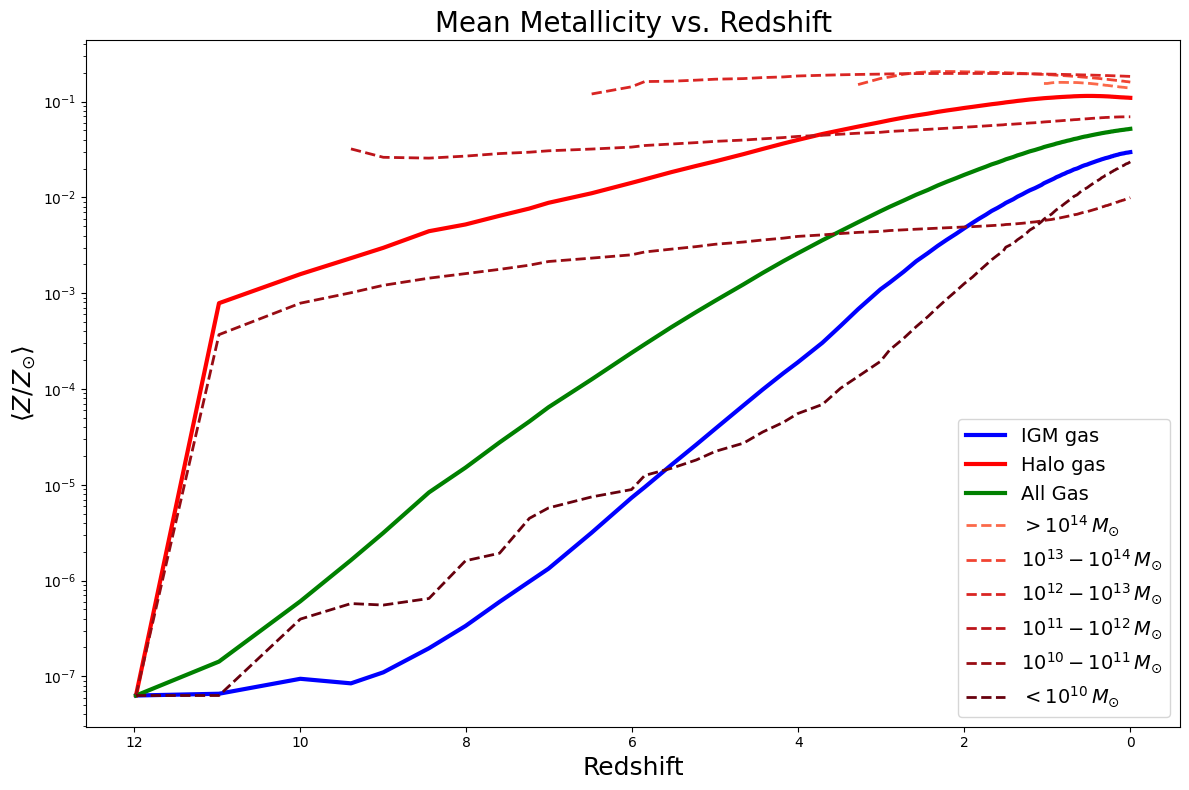

In [43]:
plt.style.use('tableau-colorblind10')


# Define the redshift values
redshift = []
for snap in range(2,100):
    redshift.append(np.round(find_value_in_snap_Z(snap),2))

# Create a figure
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the mean values for all halo gas, IGM gas, and total gas
ax.plot(redshift, IGMgas_mean, linestyle='-', linewidth=3, label="IGM gas", color='blue')
ax.plot(redshift, Halogas_mean, linestyle='-', linewidth=3, label="Halo gas", color='red')
ax.plot(redshift, IGMHalo_mean, linewidth=3, label="All Gas", color='green')

# Plot the mean values for each mass bin, using a color scheme related to the halo gas
colors = plt.cm.Reds(np.linspace(0.5, 1, len(final_mean_values))) # Color scheme for mass bins
for i, (key, values) in enumerate(final_mean_values.items()):
    if key == "-10":
        label = r"$< 10^{10} \, M_{\odot}$"
    elif key == "14+" or key == "+14":
        label = r"$> 10^{14} \, M_{\odot}$"
    else:
        label = r"$10^{" + key.split('-')[0] + "} - 10^{" + key.split('-')[1] + "} \, M_{\odot}$"
    ax.plot(redshift, values, linestyle='--', linewidth=2, label=label, color=colors[i])

# Add labels and a legend
ax.set_title('Mean Metallicity vs. Redshift', fontsize=20)
ax.set_xlabel('Redshift', fontsize=18)
ax.set_ylabel(r'$\langle Z / Z_{\odot} \rangle$', fontsize=18)
ax.legend(loc='best', fontsize=14)
ax.set_yscale("log")
plt.gca().invert_xaxis()

# Show the plot
plt.tight_layout()
plt.show()


1) Plot Z vs Halo mass at diff z
2) Make Projenitor Z evolution for halos at mass bins at z=0


In [49]:
def read_data(filename):
    bin_Z_z = {}
    with open(filename, 'r') as file:
        for line in file:
            # Split the line into the mass bin label and the values
            mass_bin, values_str = line.strip().split(': ')
            # Remove square brackets if present
            values_str = values_str.strip('[]')
            # Convert the comma-separated values into a list of floats
            values = list(map(float, values_str.split(', ')))
            # Add the values to the dictionary under the mass bin label
            bin_Z_z[mass_bin] = values
    return bin_Z_z

filename = 'bin_Z_z.txt'
data = read_data(filename)

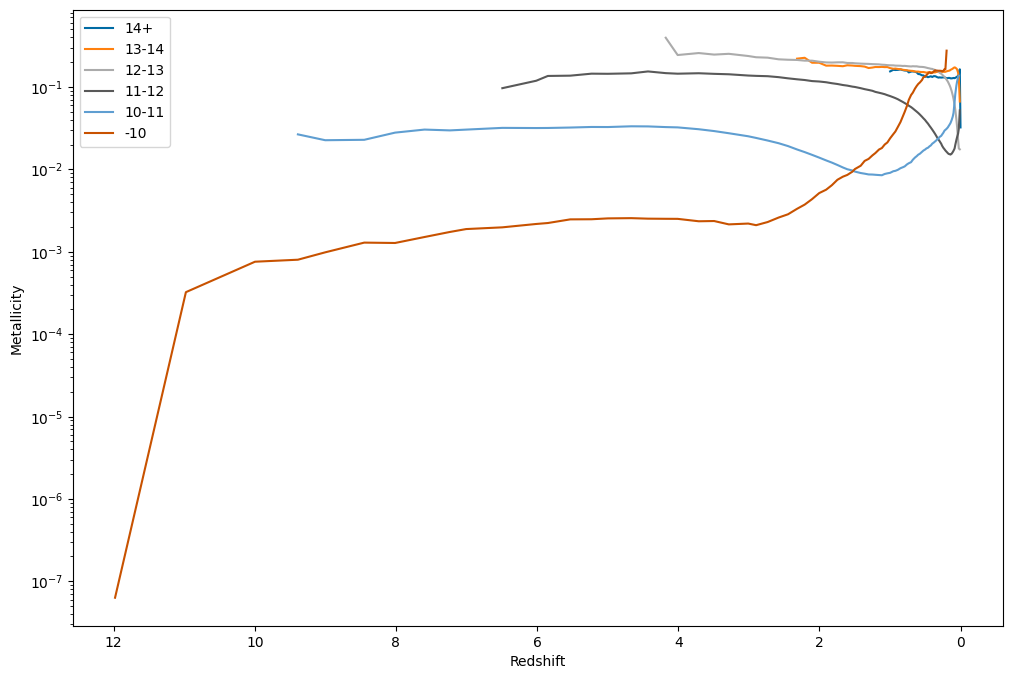

In [54]:
plt.style.use('tableau-colorblind10')

# Extract redshift values
redshifts = data["Redshift"][::6]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Plot each mass bin against the redshift
for mass_bin, values in data.items():
    if mass_bin != "Redshift":
        # Filter out zero values
        non_zero_values = [(r, v) for r, v in zip(redshifts, values) if v != 0]
        if non_zero_values:
            r_values, v_values = zip(*non_zero_values)
            ax.plot(r_values, v_values, label=mass_bin)

# Reverse the x-axis
ax.set_xlim(ax.get_xlim()[::-1])


# Add labels and legend
ax.set_xlabel('Redshift')
ax.set_ylabel('Metallicity')
ax.set_yscale('log')
ax.legend()

# Show the plot
plt.show()


#### Using ds.grouped to get the mean metallicity of the halos

In [21]:
import numpy as np
from scida import load

basePath = "/virgotng/universe/IllustrisTNG/TNG100-3/output"

def meanZcustomfunc(z):
    if len(z) == 0:
        return 0
    return z.mean()

mass_bins = [1e14, 1e13, 1e12, 1e11, 1e10]
prim_sol = 0.0127  # Assuming a value for prim_sol since it wasn't provided in the original code
halo_Z = []

# Create mass bin labels
mass_bin_labels = ["14+", "13-14", "12-13", "11-12", "10-11", "-10"]
z = []

for snap in range(2, 100):
    ds = load(basePath + f"/snapdir_{snap:03d}", units=False)
    
    z.append(ds.header["Redshift"])
    h = ds.header["HubbleParam"]
    GFM_Z = ds.data["PartType0"]["GFM_Metallicity"]
    group = ds["Group"]
    group_Mass = group["GroupMass"] * 1e10 / h
    gaop = ds.grouped(dict(halo_z=GFM_Z))

    snap_halo_Z = gaop.apply(meanZcustomfunc).evaluate() / prim_sol

    # Creating index bins to group halos based on mass
    bin_indices = np.digitize(group_Mass, mass_bins, right=True).compute()

    # Initialize a dictionary to store the binned mean values using mass bin labels
    binned_halo_Z = {label: 0 for label in mass_bin_labels}

    # Iterate through the unique bin indices
    for bin_index, label in enumerate(mass_bin_labels):
        # Get the snap_halo_Z values corresponding to the current bin index
        values_in_bin = snap_halo_Z[bin_indices == bin_index]
        
        # Calculate the mean of the values in the current bin
        mean_value = np.nanmean(values_in_bin) if values_in_bin.size else 0
        
        # Store the mean value in the binned_halo_Z dictionary
        binned_halo_Z[label] = mean_value

    # Append the binned mean values for the current snapshot to halo_Z
    halo_Z.append(binned_halo_Z)


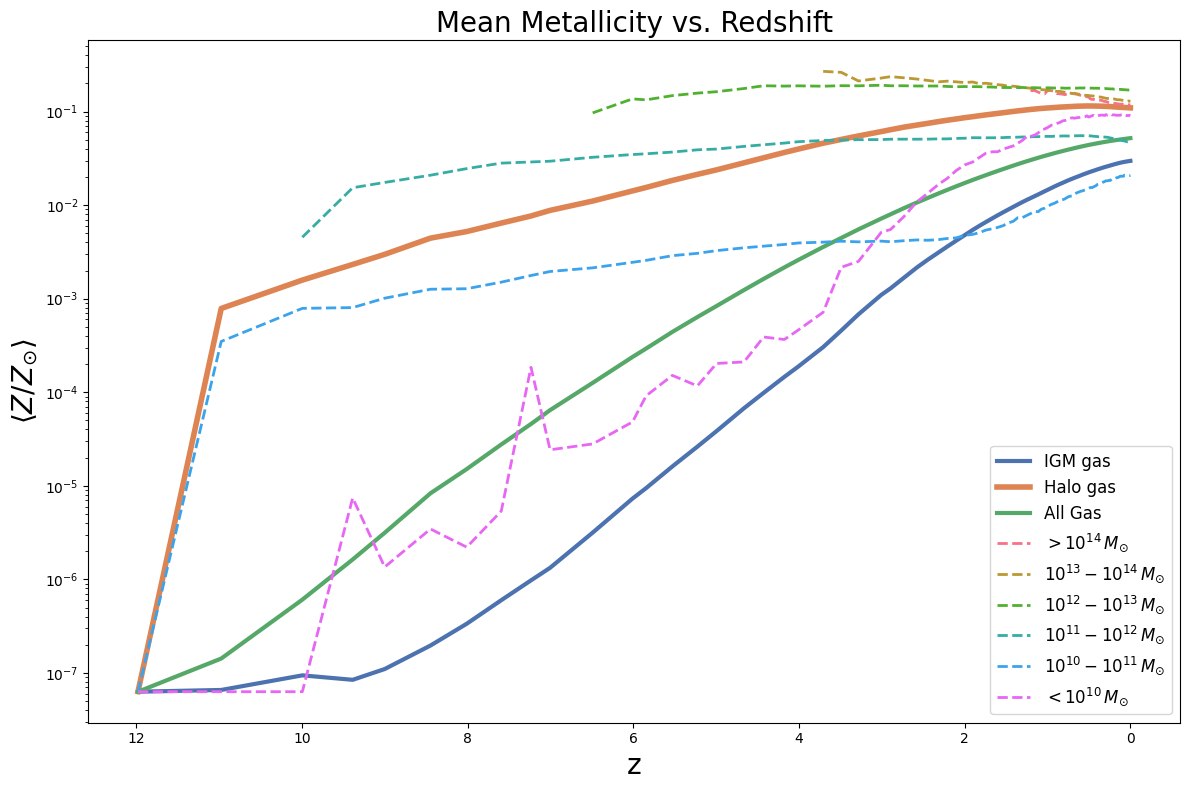

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Use Seaborn's deep color palette
colors = sns.color_palette("deep")


# Create a figure
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the mean values for IGM gas, Halo gas, and total gas
IGMgas_mean = [value if value != 0 else np.nan for value in IGMgas_mean]
Halogas_mean = [value if value != 0 else np.nan for value in Halogas_mean]
IGMHalo_mean = [value if value != 0 else np.nan for value in IGMHalo_mean]

ax.plot(z, IGMgas_mean, linestyle='-', linewidth=3, label="IGM gas", color=colors[0])
ax.plot(z, Halogas_mean, linestyle='-', linewidth=4, label="Halo gas", color=colors[1])
ax.plot(z, IGMHalo_mean, linewidth=3, label="All Gas", color=colors[2])

# Plot the binned gas data
binned_colors = sns.color_palette("husl", len(mass_bin_labels))  # Generate a gradient of colors
mass_bin_labels = ["14+", "13-14", "12-13", "11-12", "10-11", "-10"]

for i, key in enumerate(mass_bin_labels):
    metallicity = [entry[key] if entry[key] != 0 else np.nan for entry in halo_Z]
    if key == "-10":
        label = r"$< 10^{10} \, M_{\odot}$"
    elif key == "14+" or key == "+14":
        label = r"$> 10^{14} \, M_{\odot}$"
    else:
        label = r"$10^{" + key.split('-')[0] + "} - 10^{" + key.split('-')[1] + "} \, M_{\odot}$"

    ax.plot(z, metallicity, linestyle='--', linewidth=2, color=binned_colors[i], label=label)

# Add labels, title, and legend
ax.set_title('Mean Metallicity vs. Redshift', fontsize=20)
ax.set_xlabel('z', fontsize=20)  # Increase fontsize here
ax.set_ylabel(r'$\langle Z / Z_{\odot} \rangle$', fontsize=20)  # Increase fontsize here
ax.legend(loc='best', fontsize=12)
ax.set_yscale("log")
plt.gca().invert_xaxis()


# Show the plot
plt.tight_layout()
plt.show()
